In [3]:
print("Tweets identificados con código     :",len(tw_id),"\n",
      "Tweets con usuario identificado     :",len(tw_user_id),"\n",
      "Tweets con nombre de usuario        :",len(tw_user),"\n",
      "Textos de tweets recuperados        :",len(tw_text),"\n",
      "Total de Menciones en los tweets    :",len(entities_long),"\n",
      "Tweets con menciones identificadas  :",len(mentioned_ids),"\n",
      "Tweets con dispositivos registrado  :",len(tw_device),"\n",
      "Tweets con fechas registradas       :",len(tw_date),"\n"
     )

Tweets identificados con código     : 14213 
 Tweets con usuario identificado     : 14213 
 Tweets con nombre de usuario        : 14213 
 Textos de tweets recuperados        : 14213 
 Total de Menciones en los tweets    : 84935 
 Tweets con menciones identificadas  : 14213 
 Tweets con dispositivos registrado  : 14213 
 Tweets con fechas registradas       : 14213 



In [4]:
tweets_ids=pd.DataFrame({"tw_user_id":tw_user_id,"tw_user":tw_user}, index=tw_id)
ids_freqs=pd.crosstab(index=tweets_ids.tw_user, columns="count")
ids_freqs=ids_freqs.sort_values(by=['count'] , ascending=False)["count"]
print("twiteros:",ids_freqs.shape[0])

twiteros: 7164


row_0
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>    8812
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>      3126
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                      1225
<a href="https://mobile.twitter.com" rel="nofollow">Twitter Lite</a>                     781
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>        239
<a href="https://mobile.twitter.com" rel="nofollow">Mobile Web (M2)</a>                    7
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>        7
<a href="https://twitterrific.com/mac" rel="nofollow">Twitterrific for Mac</a>             4
<a href="https://twitterrific.com/ios" rel="nofollow">Twitterrific for iOS</a>             2
<a href="http://www.tweetcaster.com" rel="nofollow">TweetCaster for Android</a>            2
<a href="https://sumall.com/" rel="nofollow">SumAll</a>         

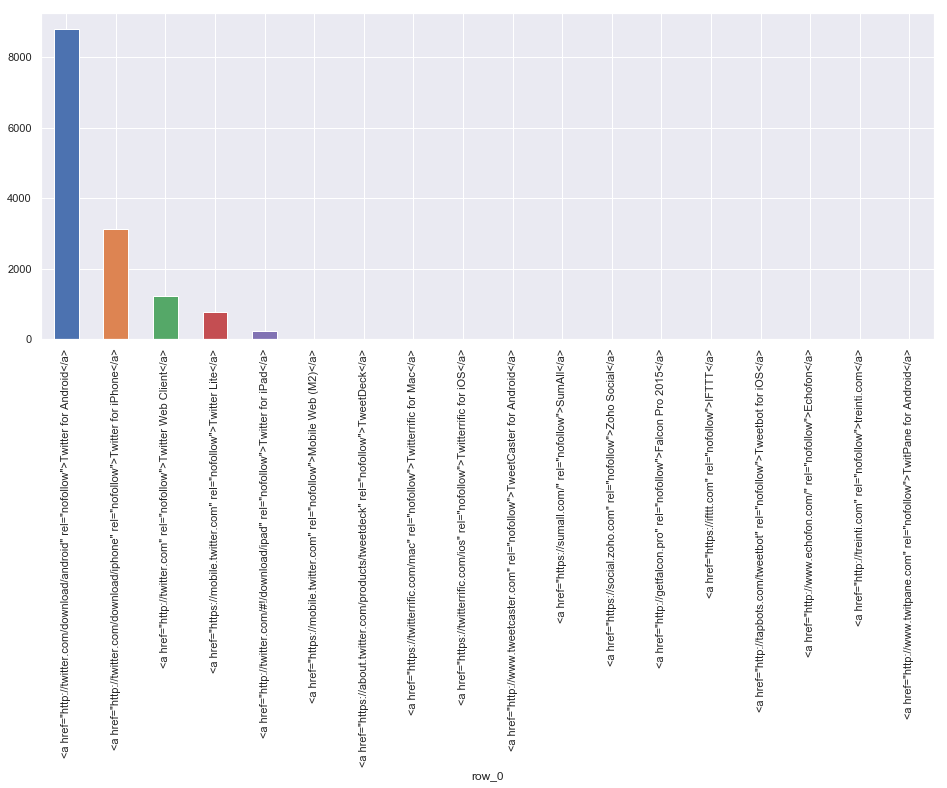

In [5]:
devices=pd.crosstab(index=np.array(tw_device), columns="count")
devices=devices.sort_values(by=['count'] , ascending=False)["count"]
devices.plot(figsize=(16, 6), kind="bar")
devices

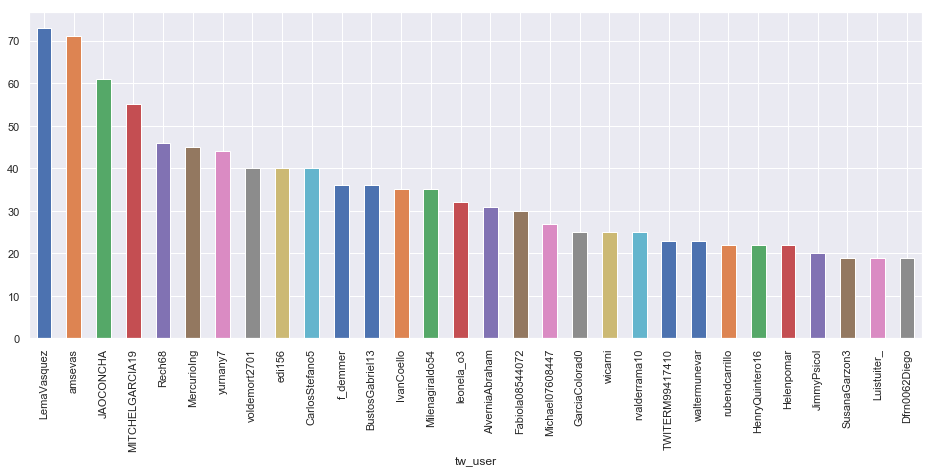

In [9]:
ids_freqs[:30].plot(figsize=(16, 6), kind="bar")
plt.savefig('top_tweeters.png')

In [10]:
ids_freqs.sort_values(ascending=False)[:60]# tuits generados por cuentas

tw_user
LemaVasquez        73
amsevas            71
JAOCONCHA          61
MITCHELGARCIA19    55
Rech68             46
MercurioIng        45
yurnany7           44
CarlosStefano5     40
edi156             40
voldemort2701      40
f_demmer           36
BustosGabriel13    36
IvanCoello         35
Milenagiraldo54    35
leonela_o3         32
AlverniaAbraham    31
Fabiola08544072    30
Michael07608447    27
rvalderrama10      25
wicarni            25
GarciaColorad0     25
TWITERM99417410    23
waltermunevar      23
rubendcarrillo     22
HenryQuintero16    22
Helenpomar         22
JimmyPsicol        20
Dfrn0062Diego      19
Luistuiter_        19
SusanaGarzon3      19
TatiMesghina       18
JuanGui39969790    18
PORMIPATRIAYA      18
danielvinci88      18
cahugugo           17
Andrs85847823      17
_MeDicenAndres     17
SiALaJEP1          17
Andres051c         16
midelato           16
nervencid          16
chapuchapulines    16
HernnAlonsopal1    15
vvelez14           15
linda0863          15
Mo

# Clustering Nexos¶


In [51]:
mntns_top_ocurr.shape

(14213, 300)

MafeCarrascal      9622
millersoto         2603
IvanDuque          1534
GarciaColorad0     1333
matadoreltiempo     912
ghitis              800
petrogustavo        660
ChurchillBogota     589
AlvaroUribeVel      585
andresportillo_     585
JEP_Colombia        580
HernanArizaG        548
JuanManSantos       527
Marianiniecheve     500
GustavoBolivar      498
porras_edgar        418
ClaudiaLopez        327
NanyPardo           294
AUGUSTOOCAMPO       288
Ariasvilla          287
dtype: int64


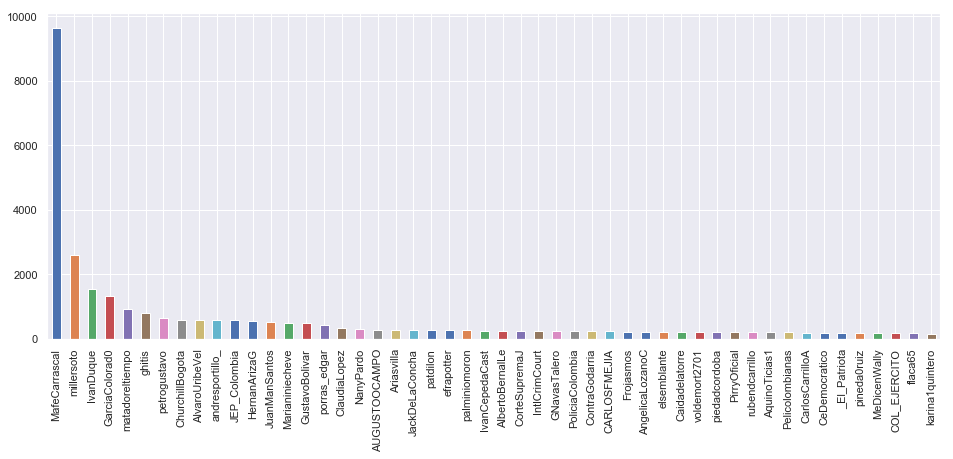

In [54]:
plt.figure(figsize=(16,6))
print (df_mntns_top_ocurr.sum(axis=0).sort_values(ascending=False)[:20])
df_mntns_top_ocurr.sum(axis=0).sort_values(ascending=False)[:50].plot(kind="bar")
plt.savefig('top_mentions.png')

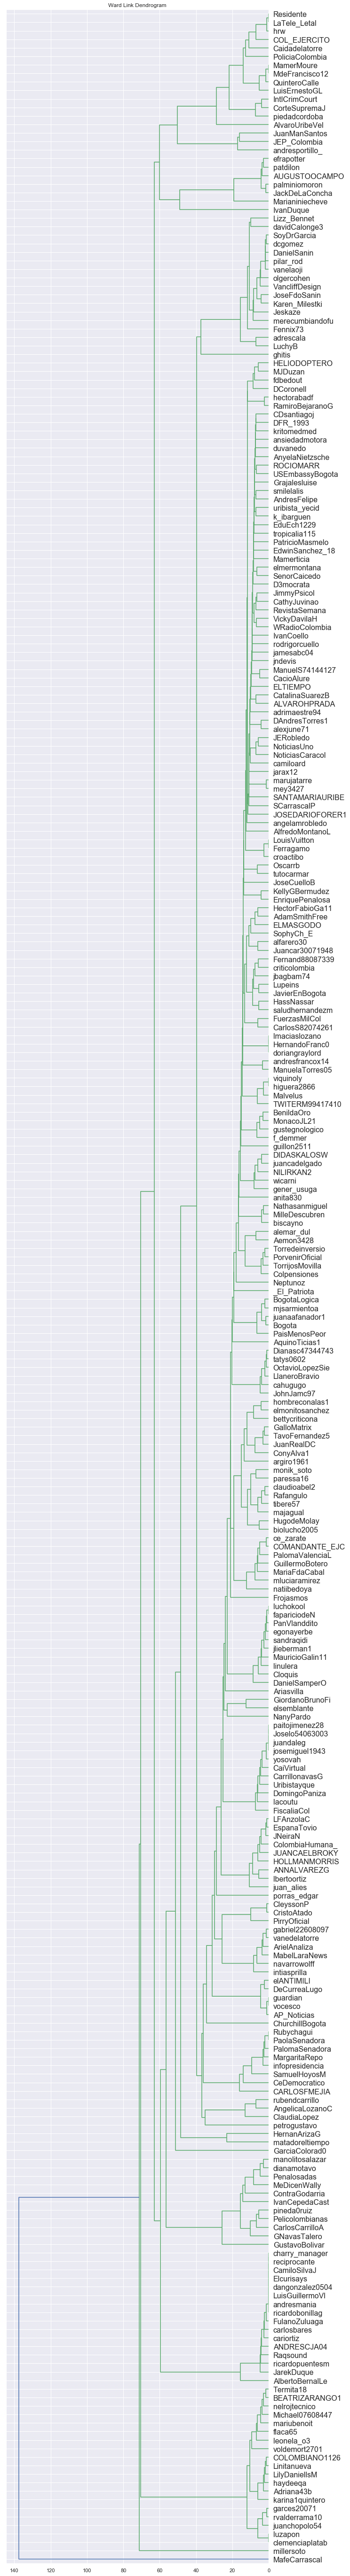

In [23]:
#max_d = 10
plt.figure(figsize=(10,100))
#plt.figure()
dn = hierarchy.dendrogram(mntns_ward,orientation="left", labels=names_mnts_top)
#plt.axhline(y=max_d, c='k')
plt.title('Ward Link Dendrogram')
plt.yticks(fontsize=16)
plt.savefig('dendrograma_ward_link_mentions.png')
plt.show()

In [57]:
df_mntns_top_ocurr.shape

(14213, 300)

# Relaciones de cuentas

In [70]:
directed_graph_df.sum(axis=1).sort_values(ascending=False)[:50]#Mayores mencionadores

LemaVasquez        1241.0
amsevas            1158.0
leonela_o3          538.0
voldemort2701       503.0
Michael07608447     491.0
rvalderrama10       422.0
JarekDuque          297.0
TWITERM99417410     221.0
clemenciaplatab     191.0
Raqsound            172.0
SalomnM             170.0
Dicorepi            168.0
jamesabc04          168.0
MITCHELGARCIA19     160.0
CarlosStefano5      159.0
JAOCONCHA           155.0
ANDRESCJA04         152.0
ElSocio1987         152.0
f_demmer            142.0
Oscarrb             136.0
cariortiz           135.0
cincinatux          124.0
nelrojtecnico       115.0
jorgeborjajp        114.0
linulera            114.0
BustosGabriel13     112.0
cahugugo            111.0
patdilon            108.0
wicarni             108.0
Rech68              106.0
dangonzalez0504     105.0
MonroyUS            105.0
MercurioIng         103.0
LeilaChujfi         100.0
Catheri88132613      93.0
edi156               92.0
JohnJamc97           91.0
Adriana43b           90.0
yurnany7    

In [71]:
directed_graph_df.sum(axis=0).sort_values(ascending=False)[:50]#Los más mencionados

MafeCarrascal      9622.0
millersoto         2603.0
IvanDuque          1534.0
GarciaColorad0     1333.0
matadoreltiempo     912.0
ghitis              800.0
petrogustavo        660.0
ChurchillBogota     589.0
AlvaroUribeVel      585.0
andresportillo_     585.0
JEP_Colombia        580.0
HernanArizaG        548.0
JuanManSantos       527.0
Marianiniecheve     500.0
GustavoBolivar      498.0
porras_edgar        418.0
ClaudiaLopez        327.0
NanyPardo           294.0
AUGUSTOOCAMPO       288.0
Ariasvilla          287.0
JackDeLaConcha      279.0
patdilon            277.0
efrapotter          276.0
palminiomoron       276.0
IvanCepedaCast      257.0
AlbertoBernalLe     252.0
CorteSupremaJ       251.0
IntlCrimCourt       247.0
GNavasTalero        247.0
PoliciaColombia     246.0
ContraGodarria      241.0
CARLOSFMEJIA        232.0
Frojasmos           224.0
AngelicaLozanoC     222.0
elsemblante         217.0
Caidadelatorre      215.0
voldemort2701       213.0
piedadcordoba       211.0
PirryOficial

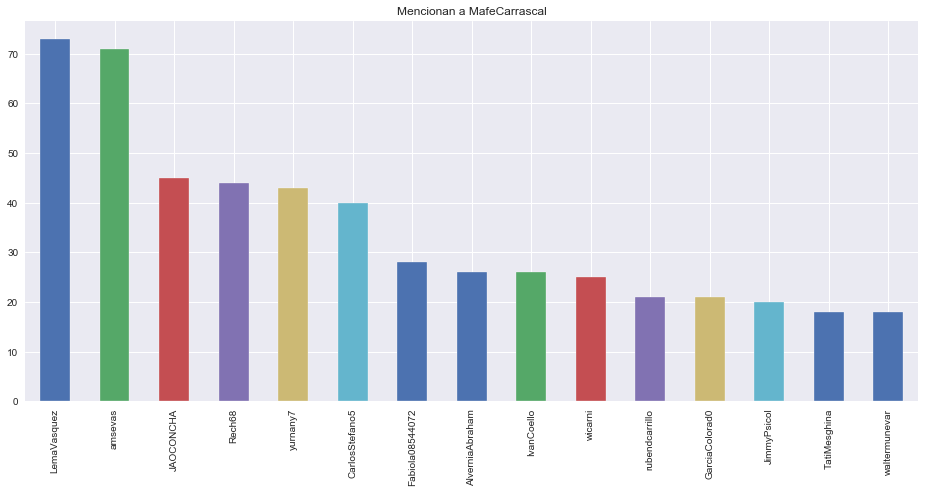

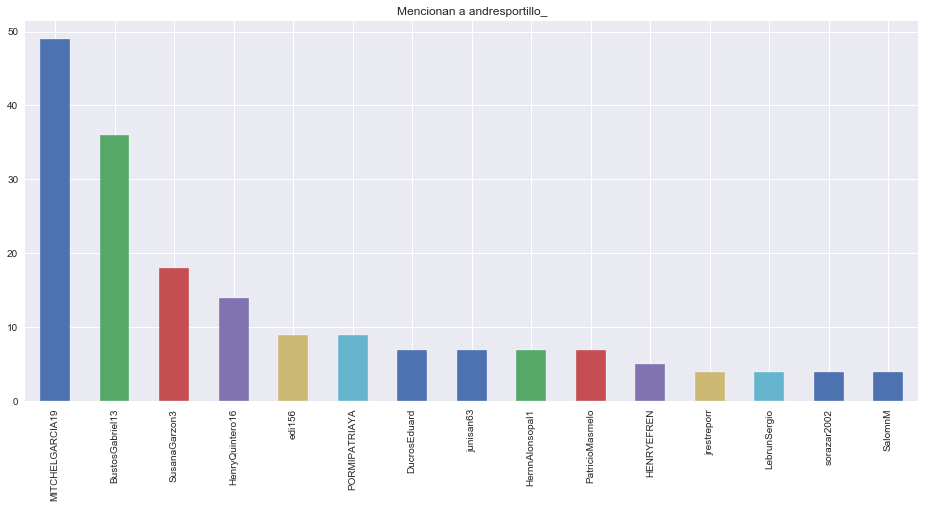

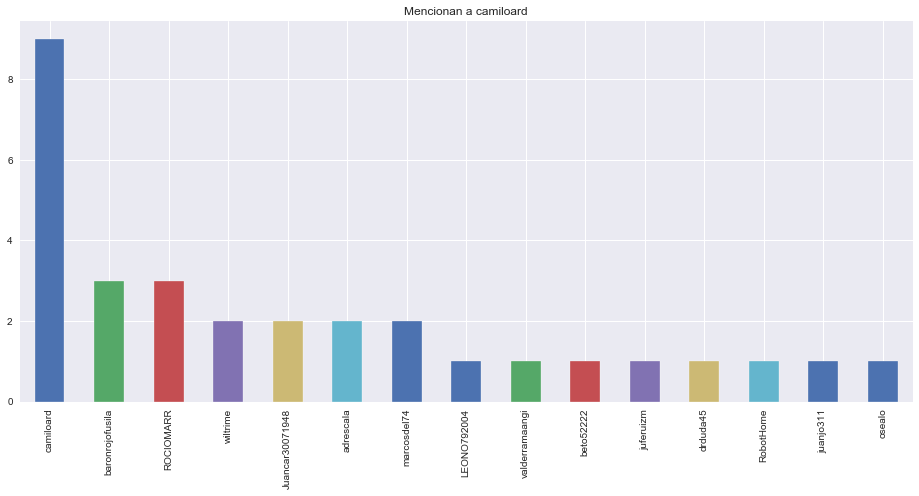

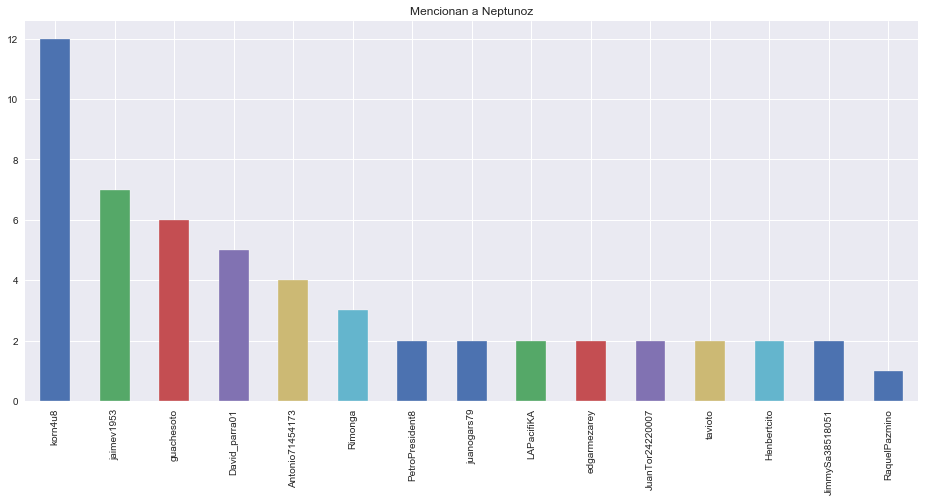

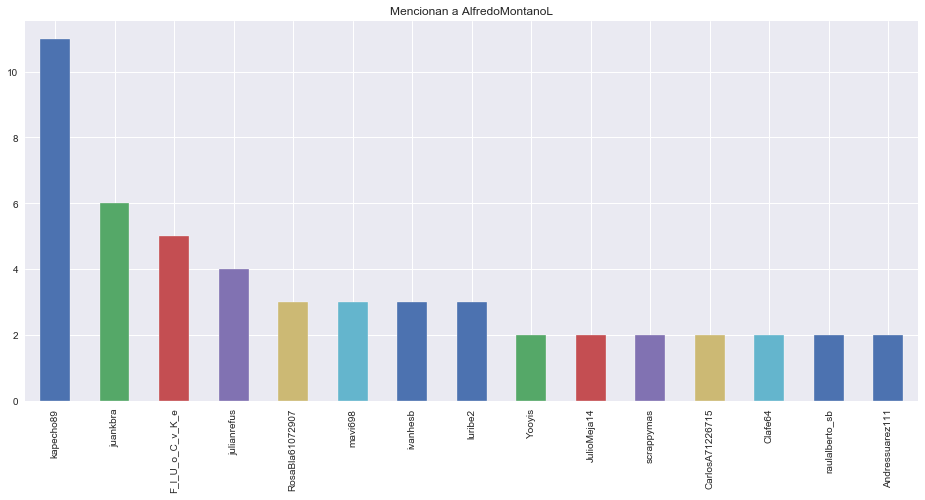

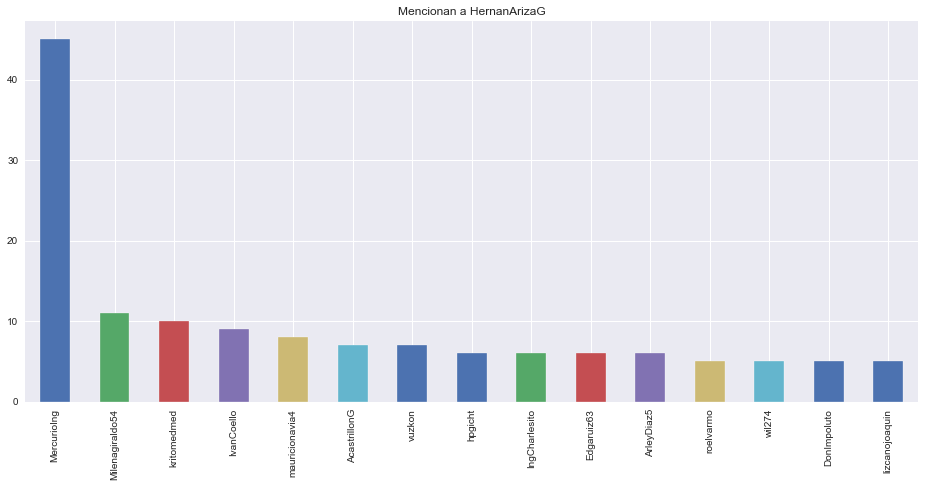

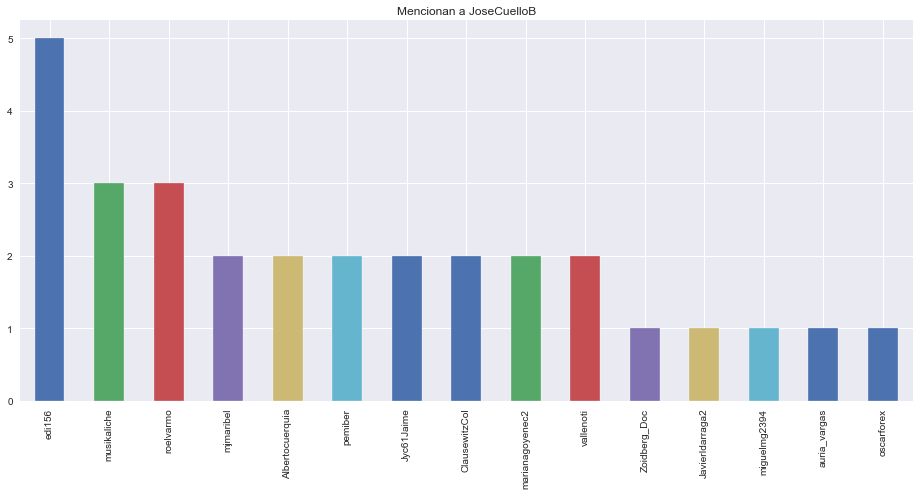

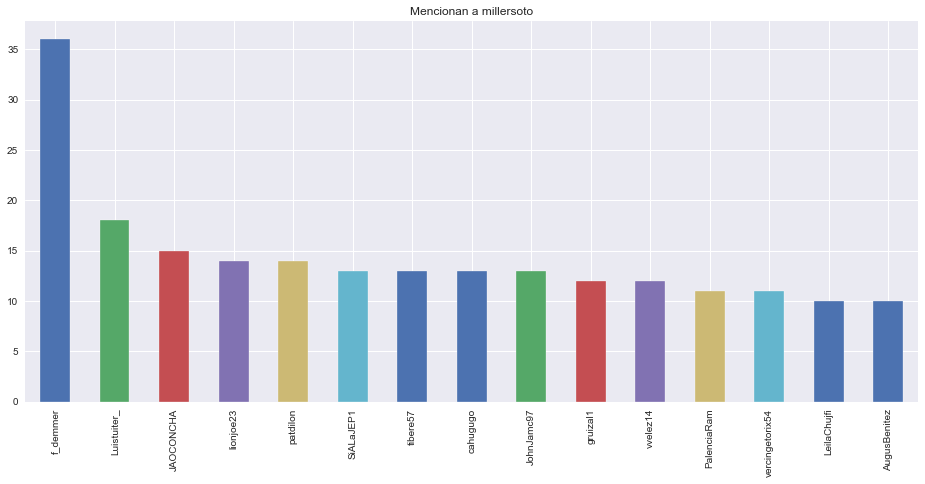

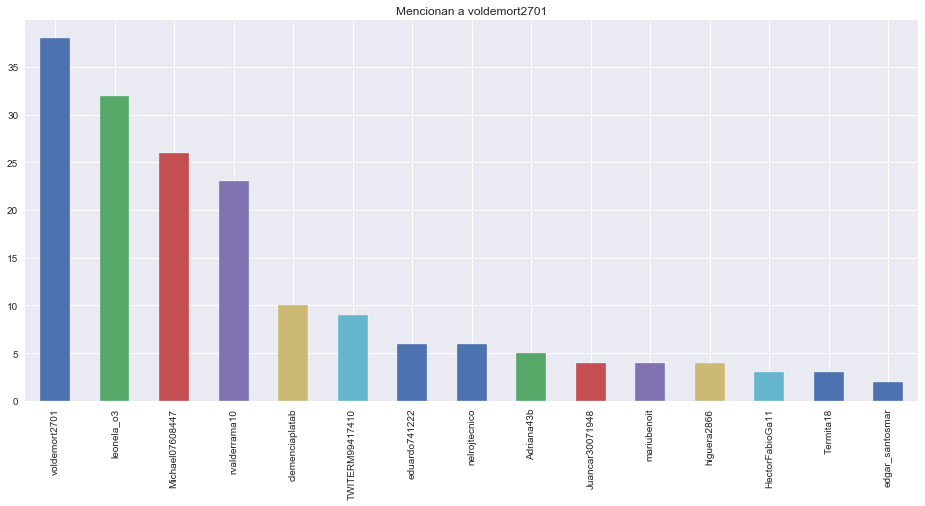

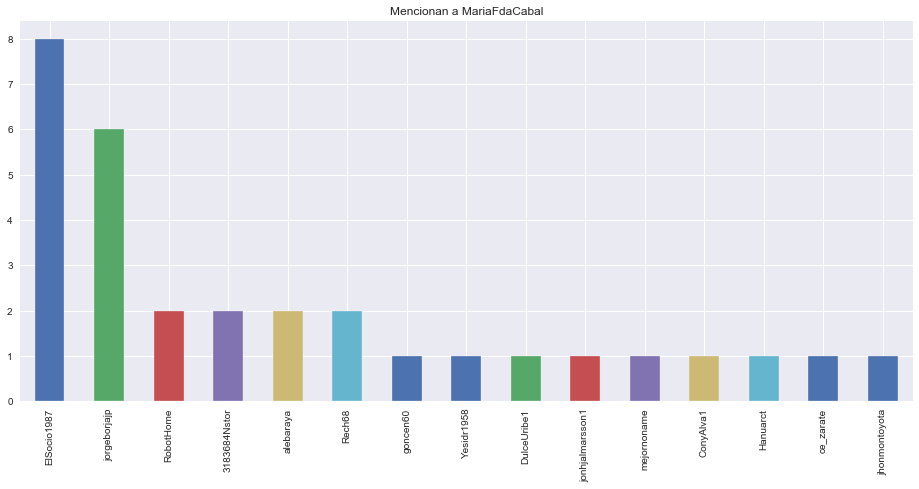

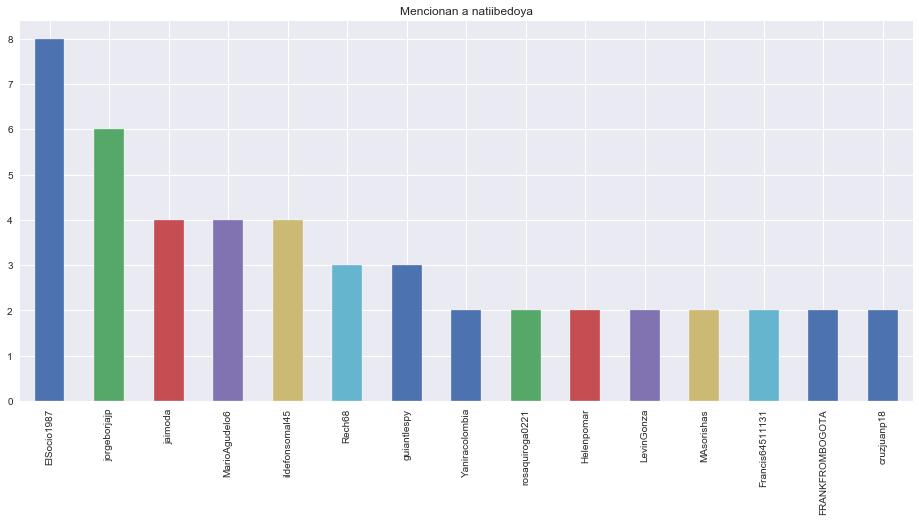

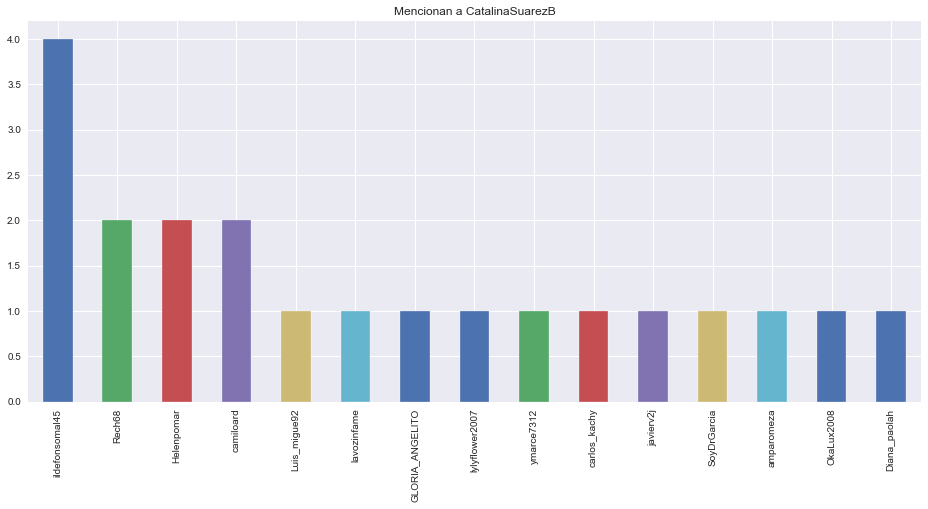

In [181]:
for tp_twtr in top_tuiteros:
    plt.figure(figsize=(16,7))
    tp_twtr[1].plot(kind="bar")
    plt.title("Mencionan a "+tp_twtr[0])
    plt.show()

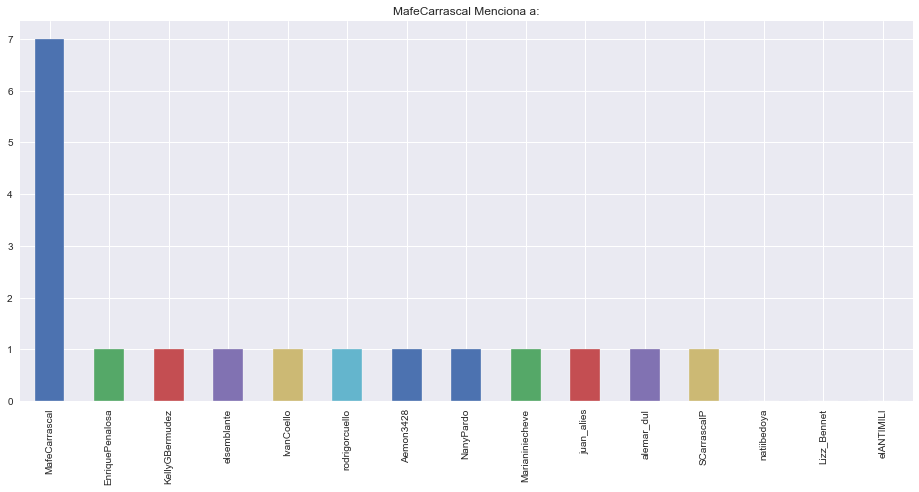

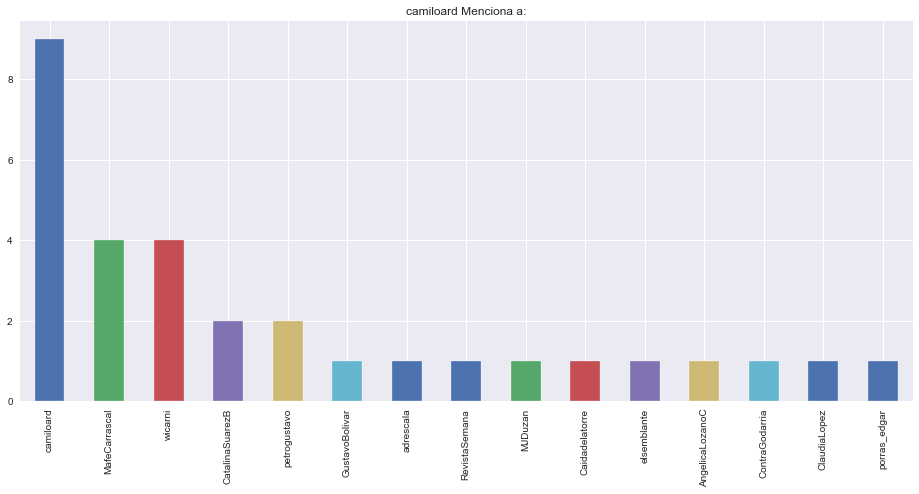

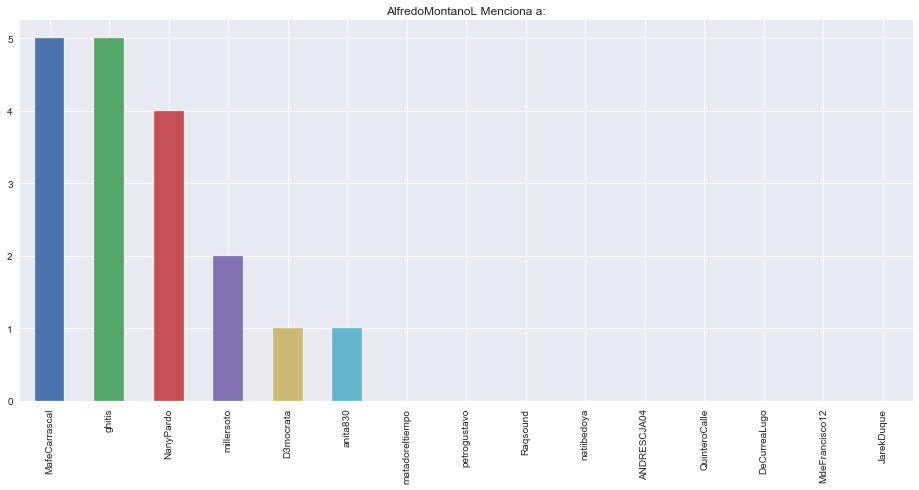

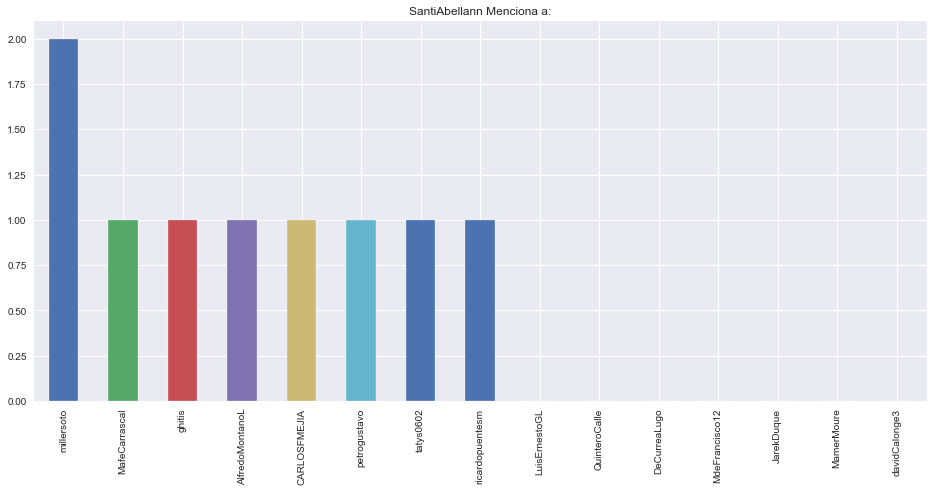

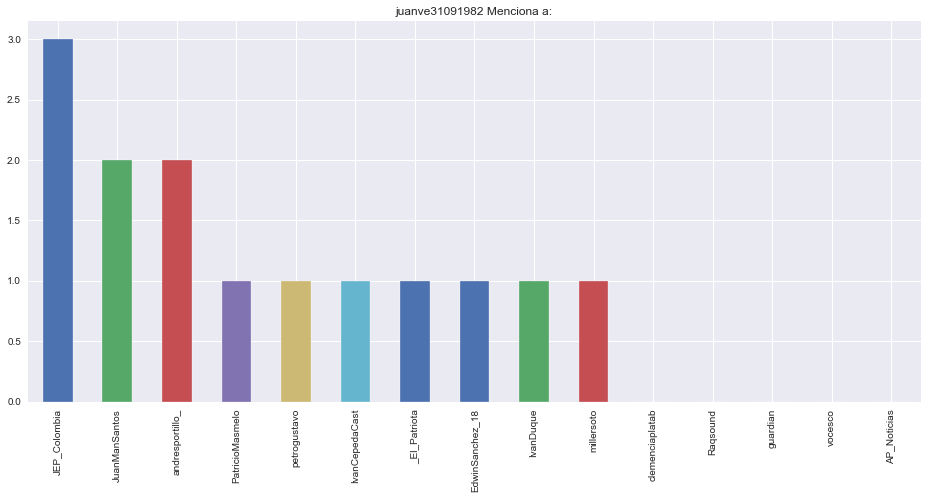

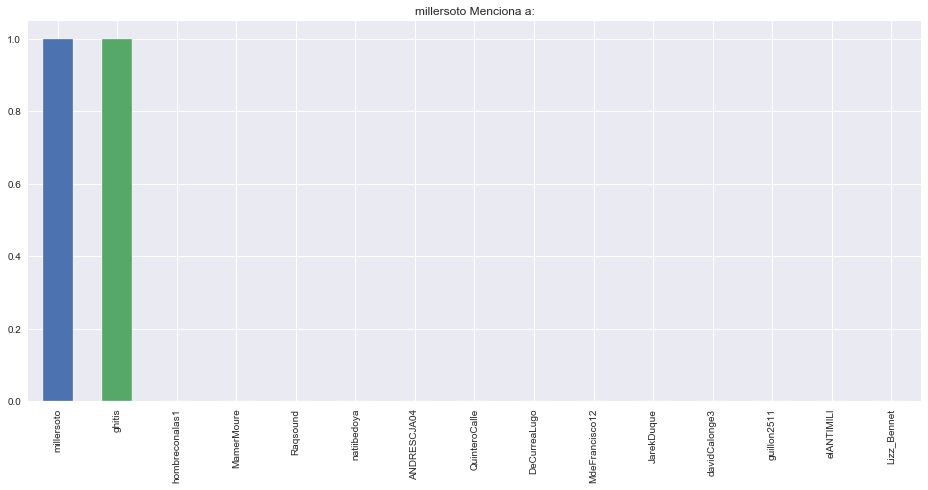

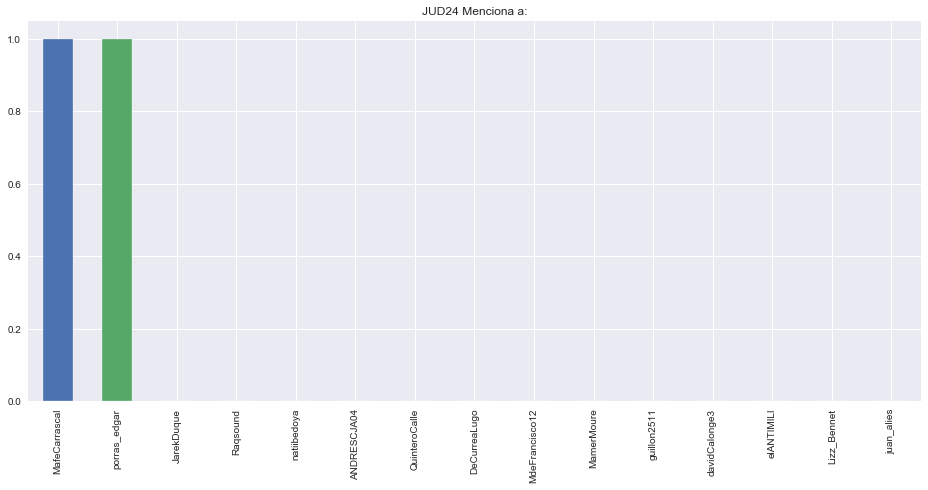

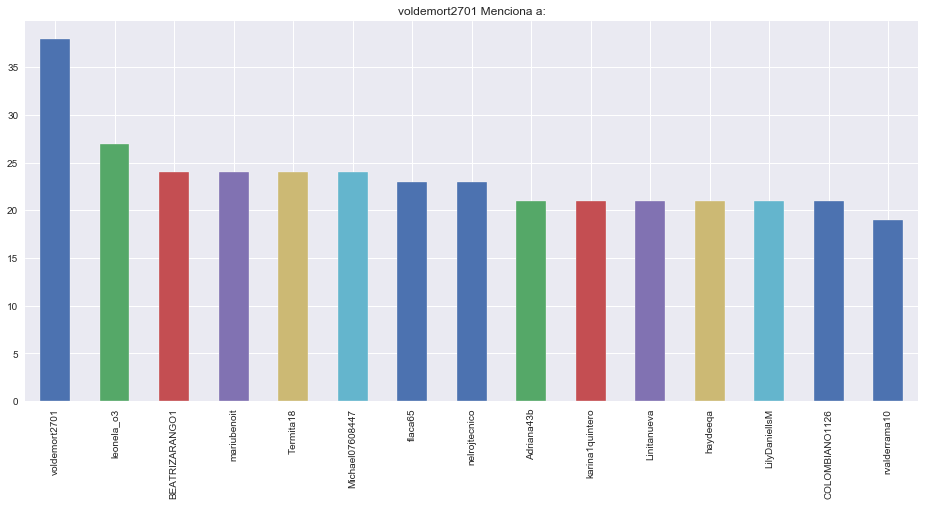

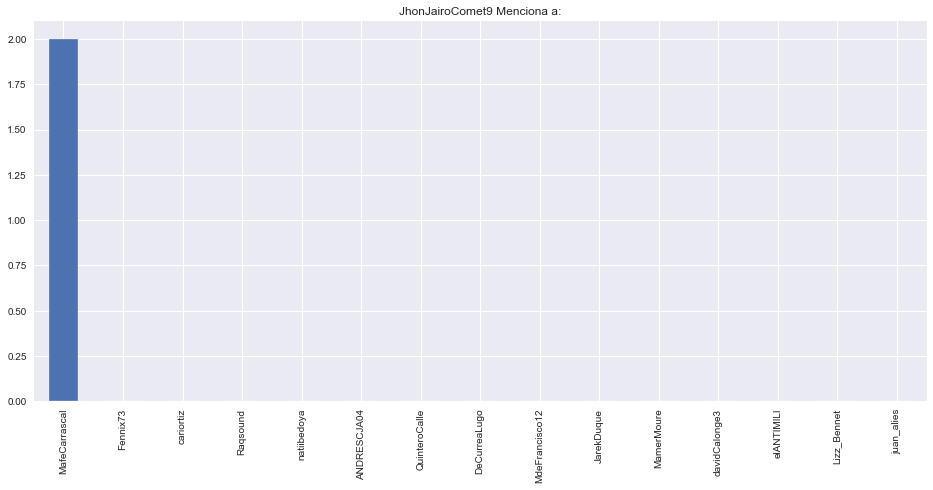

In [184]:
for tp_twtr in top_mencionan:
    plt.figure(figsize=(16,7))
    tp_twtr[1].plot(kind="bar")
    plt.title(tp_twtr[0]+" Menciona a:")
    plt.show()